### Binary Classification: Confusion Matrix

In [77]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [78]:
# import csv data to dataframe

url = 'https://github.com/prasertcbs/basic-dataset/raw/master/study_hours.csv' # Aj.Prasert's github
df = pd.read_csv(url)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py

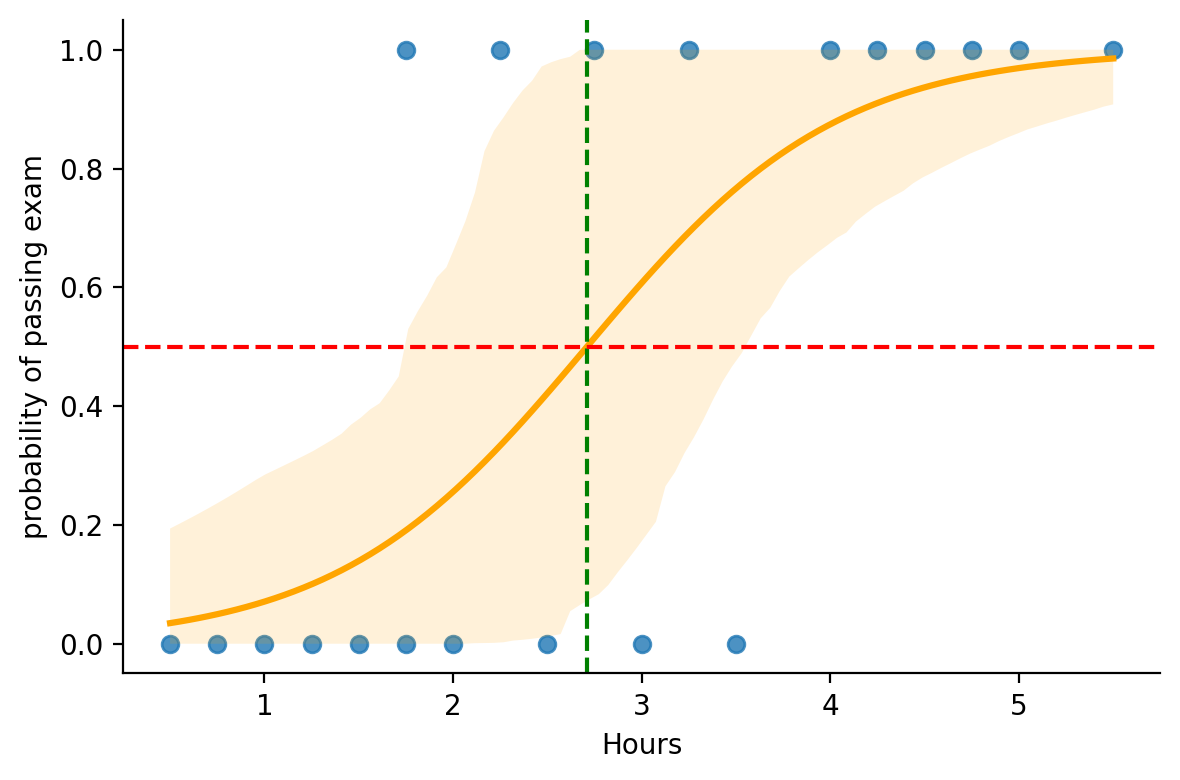

In [79]:
sns.lmplot(data = df, x = 'Hours', y = 'Pass', logistic = True, height = 4, aspect = 1.5, line_kws = {'color': 'orange'})

plt.ylabel('probability of passing exam')
plt.axvline(2.71, color = 'green', linestyle = '--')
plt.axhline(.5, color = 'red', linestyle = '--');

### Scikit-learn: LogisticRegression

In [80]:
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [81]:
# split data

X_train, X_test, y_train, y_test = train_test_split(df[['Hours']], df['Pass'], test_size = .05, random_state = 3) # test_size = 0 to use all data for training
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19, 1), (1, 1), (19,), (1,))

In [82]:
X_train # pandaas DataFrame

,Hours
2,1.00
1,0.75
17,4.75
4,1.50
16,4.50
6,1.75
7,2.00
15,4.25
12,3.25
9,2.50


In [83]:
y_train # pandas Series

2     0
1     0
17    1
4     0
16    1
6     1
7     0
15    1
12    1
9     0
11    0
19    1
18    1
13    0
5     0
0     0
8     1
3     0
10    1
Name: Pass, dtype: int64

In [84]:
model = LogisticRegression()
model

LogisticRegression()

In [85]:
model.fit(X_train, y_train) # fit/train a model

LogisticRegression()

In [86]:
model.score(X_train, y_train) # accuracy score of the model

0.7368421052631579

In [87]:
y_pred = model.predict(X_train)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

### Confusion Matrix

In [88]:
from sklearn import metrics

# from sklearn.metrics import confusion_matrix, class_likelihood_ratios, accuracy_score, precision_recall_curve, recall_score

In [89]:
X_train['Hours'].values

array([1.  , 0.75, 4.75, 1.5 , 4.5 , 1.75, 2.  , 4.25, 3.25, 2.5 , 3.  ,
       5.5 , 5.  , 3.5 , 1.75, 0.5 , 2.25, 1.25, 2.75])

In [90]:
y_train.values # real values

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1])

In [91]:
y_pred # predicted values

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

![Screenshot 2566-08-14 at 11.11.59.png](<attachment:Screenshot 2566-08-14 at 11.11.59.png>)
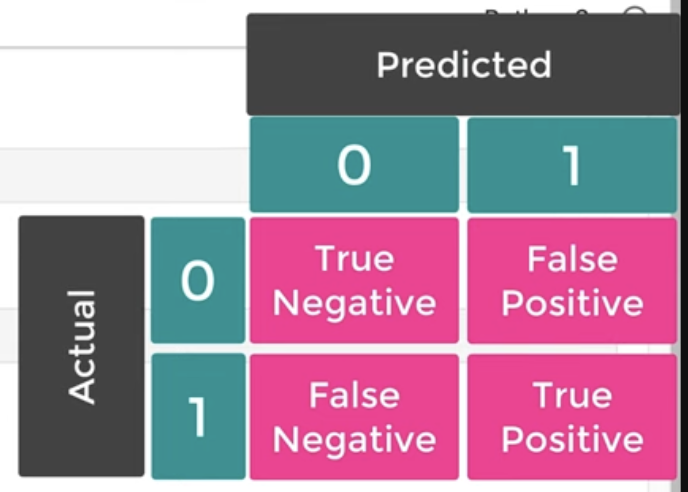

In [92]:
metrics.confusion_matrix(y_train, y_pred) # create confusion matrix from real value

array([[8, 2],
       [3, 6]])

In [ ]:
# 8 is tn, 2 is fp, 3 is fn, 6 is tp - we want high values fn and tp

In [93]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, y_pred).ravel()

In [94]:
print(f'tn = {tn}') # true negative
print(f'fp = {fp}') # false positive
print(f'fn = {fn}') # false negative
print(f'tp = {tp}') # true positive

tn = 8
fp = 2
fn = 3
tp = 6


In [95]:
(tp + tn)/(tp+tn+fp+fn) # accuracy value from confusion matrix

0.7368421052631579

In [96]:
metrics.accuracy_score(y_train, y_pred)

0.7368421052631579

In [97]:
tp/(tp + fp) # Precision (class = 1)

0.75

In [98]:
metrics.precision_score(y_train, y_pred)

0.75

In [99]:
tp/(tp + fn) # Recall

0.6666666666666666

In [100]:
metrics.recall_score(y_train, y_pred)

0.6666666666666666

In [101]:
2 * ((tp/(tp + fp)*tp/(tp + fn))/(tp/(tp + fp)+ tp/(tp + fn))) # F1 = 2 x ((precision x recall)/(precisin + recall))

0.7058823529411765

In [102]:
2 * (metrics.precision_score(y_train, y_pred)*metrics.recall_score(y_train, y_pred)/(metrics.precision_score(y_train, y_pred) + metrics.recall_score(y_train, y_pred)))

0.7058823529411765

In [103]:
metrics.f1_score(y_train, y_pred)

0.7058823529411765

In [104]:
print(metrics.classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.75      0.67      0.71         9

    accuracy                           0.74        19
   macro avg       0.74      0.73      0.73        19
weighted avg       0.74      0.74      0.74        19



In [105]:
y_train.value_counts() # support

0    10
1     9
Name: Pass, dtype: int64